In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    './archive/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
    interpolation="bilinear",
    follow_links=True,
    smart_resize=False,
)

valid = tf.keras.preprocessing.image_dataset_from_directory(
    './archive/valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
    interpolation="bilinear",
    follow_links=True,
    smart_resize=False,
)

Found 38518 files belonging to 270 classes.
Using 34667 files for training.
Found 1350 files belonging to 270 classes.
Using 135 files for validation.


In [4]:
training

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [3]:
valid

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
# Definition of the model architecture
#labs model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[256, 256, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(280, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               58982700  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 280)               28280     
Total params: 59,041,080
Trainable params: 59,041,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model compilation
# sgd - stochastic gradient descent 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [8]:
history = model.fit(training, epochs=2, validation_data=valid)

Epoch 1/2
1084/1084 [==============================] - 224s 206ms/step - loss: 34600076147949568.0000 - accuracy: 0.0059 - val_loss: 5.6336 - val_accuracy: 0.0000e+00
Epoch 2/2
1084/1084 [==============================] - 209s 192ms/step - loss: 5.6312 - accuracy: 0.0059 - val_loss: 5.6319 - val_accuracy: 0.0000e+00


In [9]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': 1084}

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

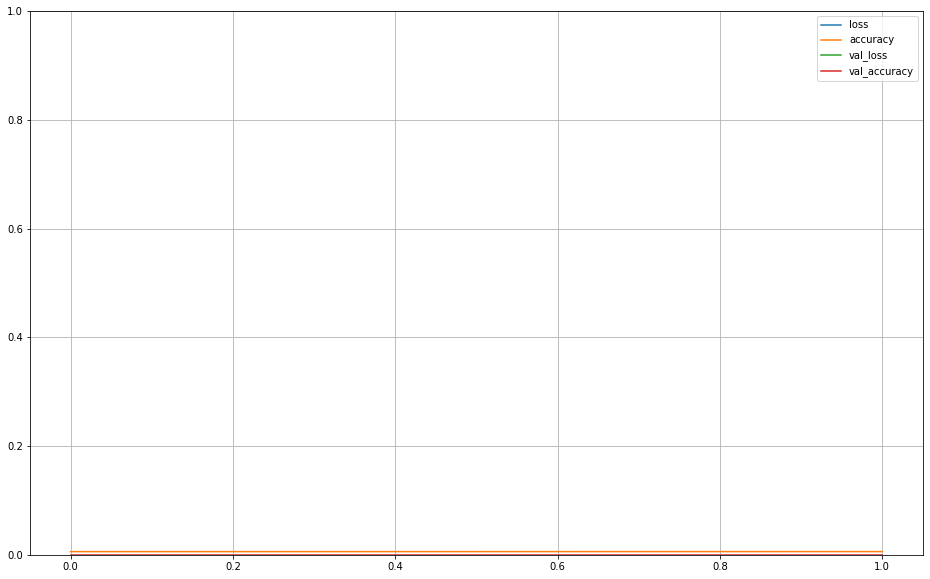

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    './archive/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    smart_resize=False,
)

Found 1350 files belonging to 270 classes.


In [13]:
# Data evaluation
model.evaluate(test)

43/43 [==============================] - 4s 78ms/step - loss: 5.6323 - accuracy: 0.0037


[5.632317066192627, 0.003703703638166189]

In [14]:
# Prediction, applied to new data
# In the vectors there are probabilities of concrete ten classes
newTest = test.take(100)
y_proba = model.predict(newTest)
y_proba.round(2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# Let us recall these 9 classes
class_names = test.class_names
class_names

['AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BANDED BROADBILL',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BEARDED REEDLING',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK & YELLOW bROADBILL',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK TAIL CRAKE',
 'BLACK THROATED BUSHTIT',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BORNEAN BRISTLEHEAD',
 'BORNEAN LEAFBIRD',
 'BROWN NOODY',
 'BROWN THRASHER',
 'BULWERS

In [16]:
# We can predict the class
import numpy as np
y_pred = np.argmax(model.predict(newTest), axis=-1)
y_pred

array([81, 81, 81, ..., 81, 81, 81])

In [17]:
np.array(class_names)[y_pred]

array(['D-ARNAUDS BARBET', 'D-ARNAUDS BARBET', 'D-ARNAUDS BARBET', ...,
       'D-ARNAUDS BARBET', 'D-ARNAUDS BARBET', 'D-ARNAUDS BARBET'],
      dtype='<U27')

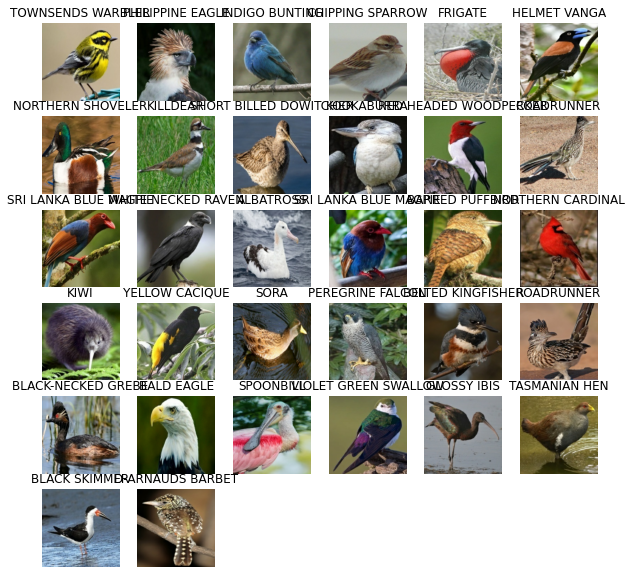

In [25]:
plt.figure(figsize=(10, 10))
class_names = test.class_names
for images, labels in test.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

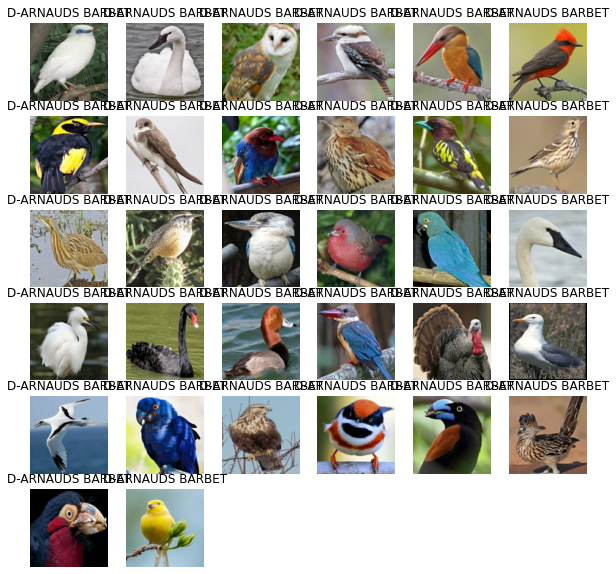

In [19]:
plt.figure(figsize=(10, 10))
class_names = test.class_names
for images, labels in test.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(np.array(class_names)[y_pred][i])
        plt.axis("off")

In [20]:
#Saving the trained model to the file (saved_model.pb)
writingPath = 'model'
model.save(writingPath)


INFO:tensorflow:Assets written to: model/assets


In [21]:
# Loading the model from the file

reconstructed_model = keras.models.load_model(writingPath)

In [22]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               58982700  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 280)               28280     
Total params: 59,041,080
Trainable params: 59,041,080
Non-trainable params: 0
_________________________________________________________________
